In [2]:
import matplotlib.pyplot as plt

def show_results_summary(results, solver):
    print("Summary for: " + solver)
    plt.plot(results[2])
    
    plt.title(solver + ' Convergence Plot')
    plt.xlabel('Iteration')
    plt.ylabel('Average Value')
    plt.show()
    
    print("Average solution score: " + str(results[0]))
    print("Average computation time: " + str(results[1]) + " ms.")
    print("\n")

In [3]:
import os
import subprocess
from statistics import mean

default_problem = "101101011010110110011111011010100010110101111001000010011011101000"

def parse_output(output):
    output_array = output.strip().split(' ')
    score = output_array[1]
    time = output_array[2]
    return float(score), int(time)

def read_conv_log_file():
    with open('conv.log', 'r') as file:
        lines = file.read().strip().split('\n')
        values = [int(line) for line in lines]
    return values

def delete_conv_log_file():
    try:
        os.remove('conv.log')
    except OSError as e:
        print(f"Error deleting file conv.log: {e}")

def add_conv_values(conv_values, new_conv_values):
    if not conv_values:
        return new_conv_values
    new_array = []
    size1 = len(conv_values)
    size2 = len(new_conv_values)
    new_array_size = min(size1, size2)

    for i in range(new_array_size):
        new_array.append(conv_values[i] + new_conv_values[i])

    return new_array

def calculate_average_conv_values(conv_values, runs_num):
    averages = []
    for e in conv_values:
        averages.append(e / runs_num)
    return averages

def run_experiment(solver, alg_iterations=1000, problem="default_problem", runs_num=100):
    results = []
    command = [
        "./metaheuristics",
        "--solver", solver,
        "--problem", problem,
        "-i", str(alg_iterations)
    ]
    conv_values = []
    
    for i in range(runs_num):
        delete_conv_log_file()
        results.append(parse_output(subprocess.run(command, capture_output=True, text=True).stdout))
        new_conv_values = read_conv_log_file()
        conv_values = add_conv_values(conv_values, new_conv_values)

    conv_values = calculate_average_conv_values(conv_values, runs_num)

    mean_score = mean([item[0] for item in results])
    mean_time = mean([item[1] for item in results])
    return mean_score, mean_time, conv_values

solvers = [
    "solve_hill_climbing", "solve_tabu", "solve_tabu_list",
    "solve_tabu_avoid_snake", "solve_sim_annealing", "solve_random",
    "solve_random_n", "solve_genetic_algorithm_iterations", "solve_genetic_algorithm"
]

#for solver in solvers:
#    results = run_experiment(solver)
#    show_results_summary(results, solver)

# 1. Specifics of each algorithm

# Hill climbing
The big downside of the hill climbing algorithm is their inability to "escape" local maximas.

Summary for: solve_hill_climbing


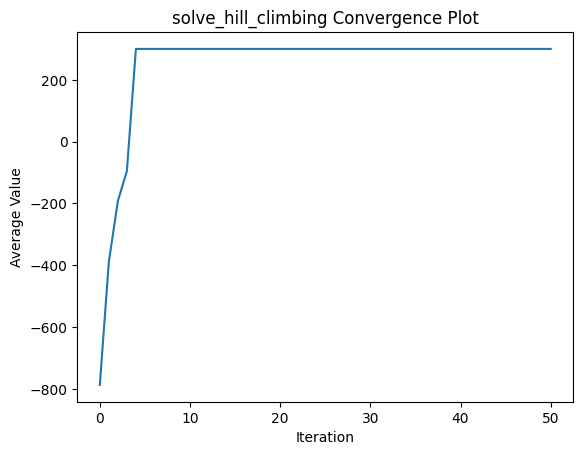

Average solution score: 300.0
Average computation time: 2175327 ms.




In [61]:
results = run_experiment("solve_hill_climbing", 50, default_problem, 1)
show_results_summary(results, "solve_hill_climbing")

# Tabu
The tabu algorithm have the advanatage over the hill climbing algorithm, that it can escape local maximas, and increases the chances that the global maximum will be find. 

Summary for: solve_tabu_avoid_snake


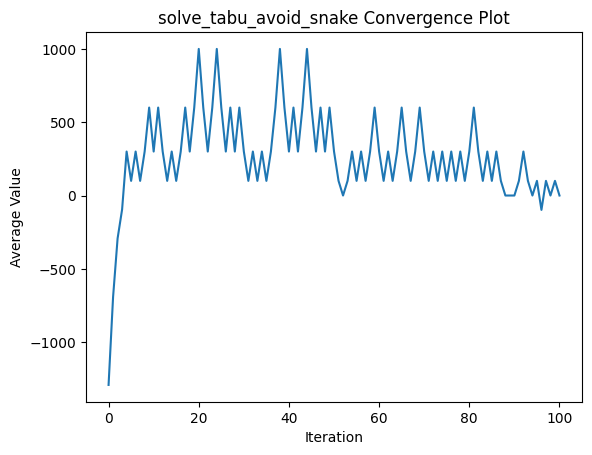

Average solution score: 1000.0
Average computation time: 11182470 ms.




In [118]:
results = run_experiment("solve_tabu_avoid_snake", 100, default_problem, 1)
show_results_summary(results, "solve_tabu_avoid_snake")

## Difference in time execution for different data structures
- using set, complexity: O(log N)

Summary for: solve_tabu


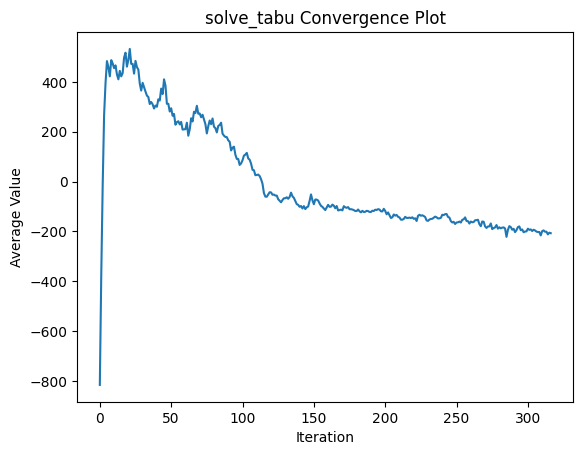

Average solution score: 1000.0
Average computation time: 120744618.55 ms.




In [116]:
results = run_experiment("solve_tabu", 2000, default_problem, 100)
show_results_summary(results, "solve_tabu")

^ "snake condition" occured *snake condition here means that there was not solution neighbour that was not in the tabu
- list, complexity: O(N)

Summary for: solve_tabu_list


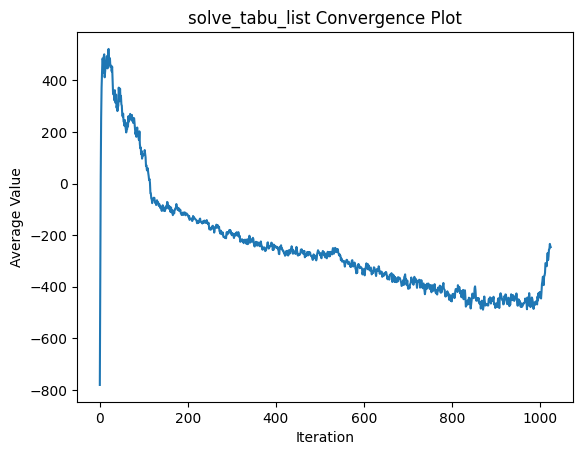

Average solution score: 1000.0
Average computation time: 982288567.22 ms.




In [115]:
results = run_experiment("solve_tabu_list", 2000, default_problem, 100)
show_results_summary(results, "solve_tabu_list")

Still it can be observed that 982 ms. using list and 120 ms. using set

# Simulated annealing
Algorithm always choose random solution as a next one. It allows to accept worse solution with some probability, that decreases over time.

Summary for: solve_sim_annealing


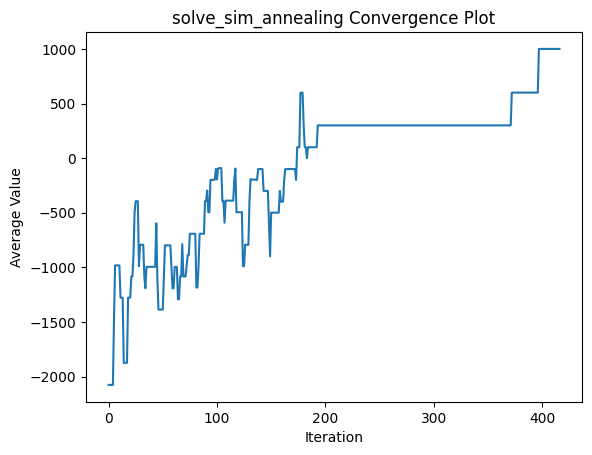

Average solution score: 1000.0
Average computation time: 8108943 ms.




In [56]:
results = run_experiment("solve_sim_annealing", 700, default_problem, 1)
show_results_summary(results, "solve_sim_annealing")

# Genetic Algorithm
## Termination based on number of generations
- crossover_type::one_point, mutation_type::bit_flip

Summary for: solve_genetic_algorithm_iterations


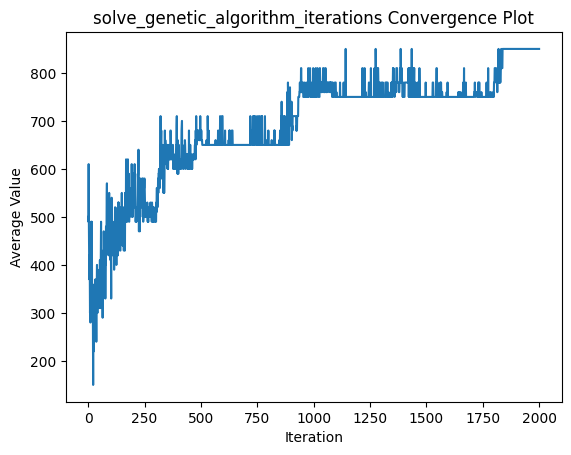

Average solution score: 850.0
Average computation time: 1204512313.6 ms.




In [79]:
results = run_experiment("solve_genetic_algorithm_iterations", 2000, default_problem, 10)
show_results_summary(results, "solve_genetic_algorithm_iterations")

- crossover_type::uniform, mutation_type::bit_flip

Summary for: solve_genetic_algorithm_uniform_crossover_iterations


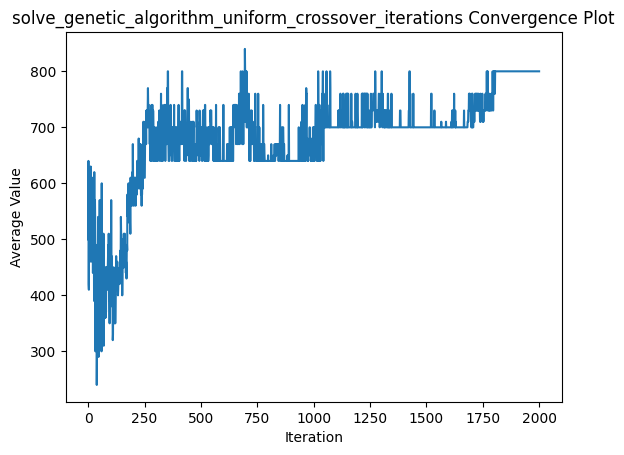

Average solution score: 800.0
Average computation time: 1355925798.4 ms.




In [82]:
results = run_experiment("solve_genetic_algorithm_uniform_crossover_iterations", 2000, default_problem, 10)
show_results_summary(results, "solve_genetic_algorithm_uniform_crossover_iterations")

- crossover_type::uniform, mutation_type::bit_flip

Summary for: solve_genetic_algorithm_bit_swap_mutation_iterations


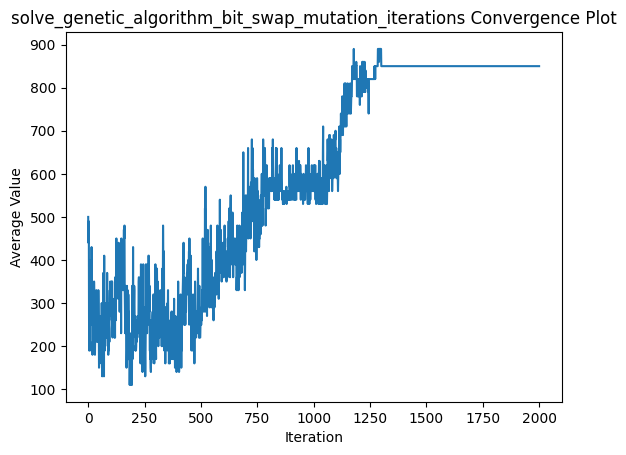

Average solution score: 850.0
Average computation time: 1374412696.2 ms.




In [83]:
results = run_experiment("solve_genetic_algorithm_bit_swap_mutation_iterations", 2000, default_problem, 10)
show_results_summary(results, "solve_genetic_algorithm_bit_swap_mutation_iterations")

- crossover_type::one_point, mutation_type::bit_swap (Mutaton probability set to 0.5) - the algorithm got completly broken :c

Summary for: solve_genetic_algorithm_bit_swap_mutation_iterations_higher_mutation_prob


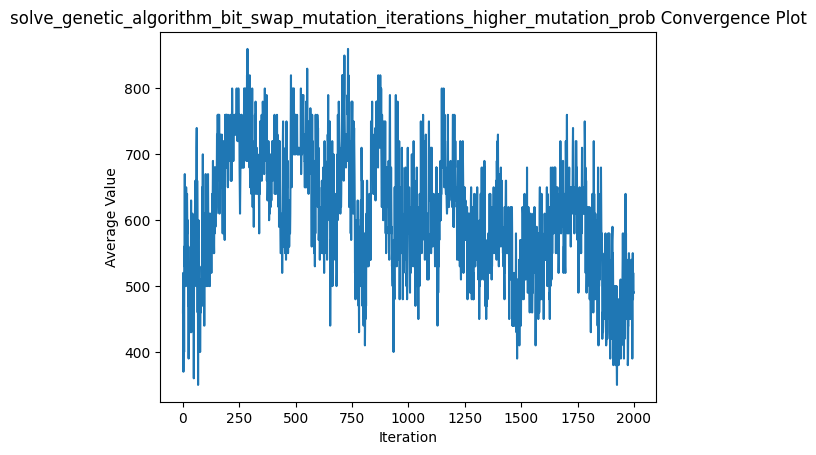

Average solution score: -440.0
Average computation time: 1280515666 ms.




In [86]:
results = run_experiment("solve_genetic_algorithm_bit_swap_mutation_iterations_higher_mutation_prob", 2000, default_problem, 10)
show_results_summary(results, "solve_genetic_algorithm_bit_swap_mutation_iterations_higher_mutation_prob")

## Termination based on number of generations without finding fitter

Summary for: solve_genetic_algorithm_bit_swap_mutation


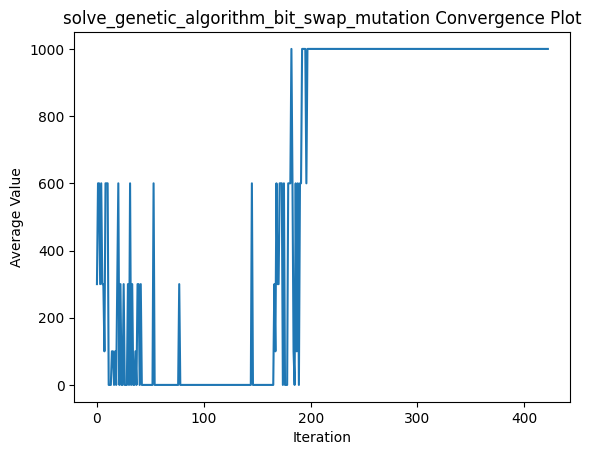

Average solution score: 1000.0
Average computation time: 553991099 ms.




In [104]:
results = run_experiment("solve_genetic_algorithm_bit_swap_mutation", 2000, default_problem, 1)
show_results_summary(results, "solve_genetic_algorithm_bit_swap_mutation")

# Genetic Algorithm with Elite

Summary for: solve_genetic_algorithm_elite_iterations


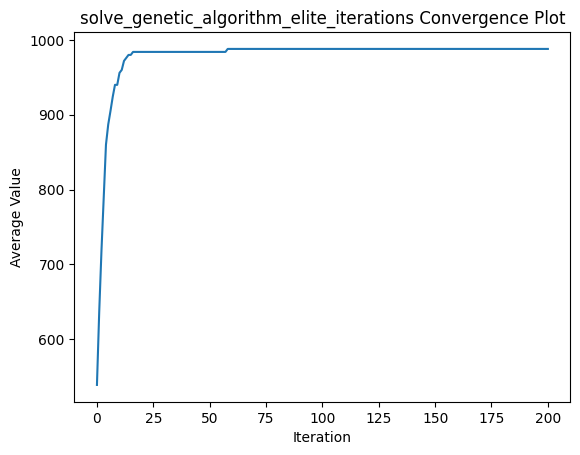

Average solution score: 988.0
Average computation time: 128148677.83 ms.




In [107]:
results = run_experiment("solve_genetic_algorithm_elite_iterations", 200, default_problem, 100)
show_results_summary(results, "solve_genetic_algorithm_elite_iterations")

### Running GA in parallel vs sequentially

Summary for: solve_genetic_algorithm_iterations_parallel


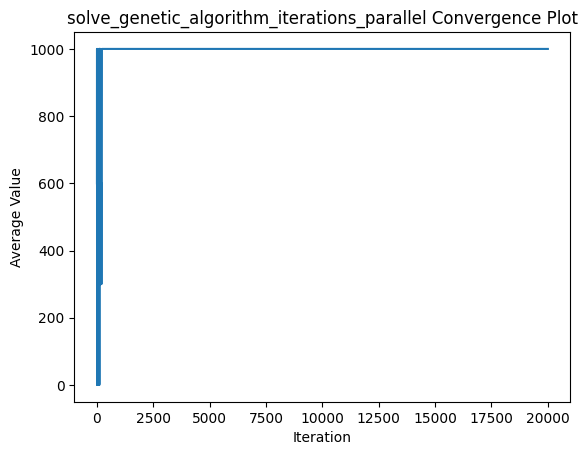

Average solution score: 1000.0
Average computation time: 8624486724 ms.




In [10]:
results = run_experiment("solve_genetic_algorithm_iterations_parallel", 20000, default_problem, 1)
show_results_summary(results, "solve_genetic_algorithm_iterations_parallel")

Summary for: solve_genetic_algorithm_iterations


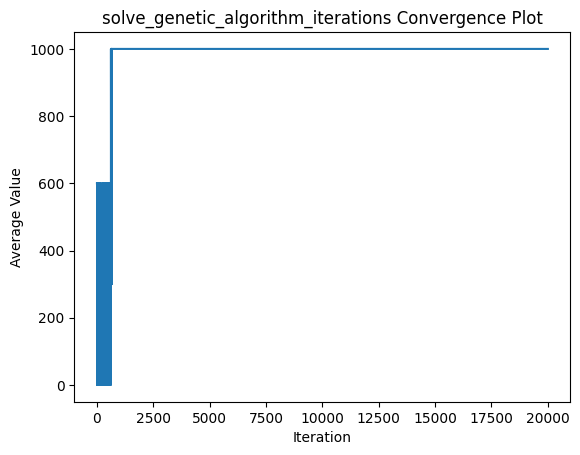

Average solution score: 1000.0
Average computation time: 11825717965 ms.




In [12]:
results = run_experiment("solve_genetic_algorithm_iterations", 20000, default_problem, 1)
show_results_summary(results, "solve_genetic_algorithm_iterations")

Results:
- parallel: 8.6s
- sequential: 11.8s

# 2. Finding the best algorithm to solve the problem

Summary for: solve_genetic_algorithm_elite_iterations


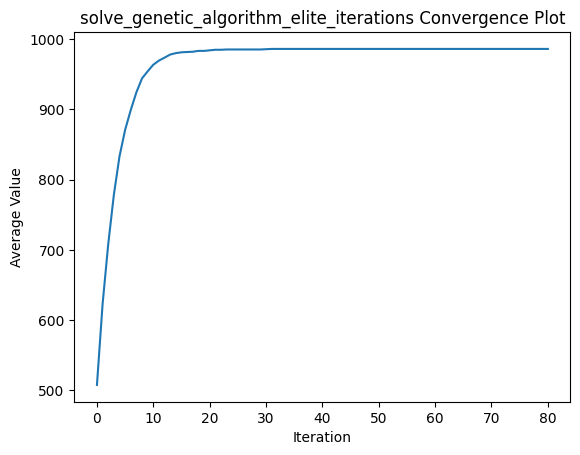

Average solution score: 986.3
Average computation time: 50668730.603 ms.


Summary for: solve_tabu_avoid_snake


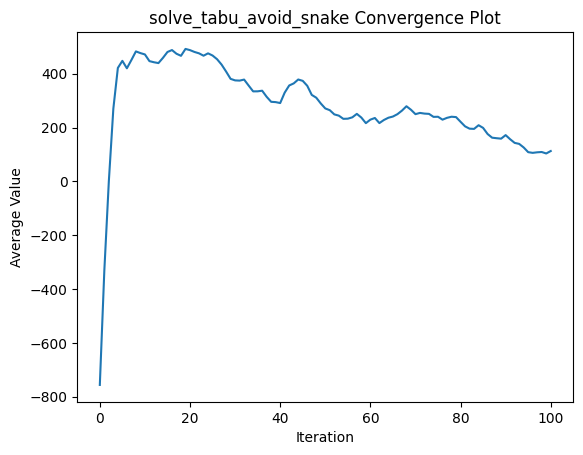

Average solution score: 1000.0
Average computation time: 6350318.523 ms.


Summary for: solve_sim_annealing


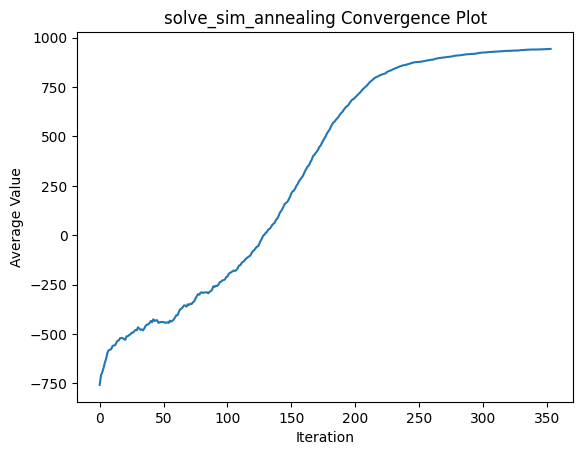

Average solution score: 970.5
Average computation time: 8390430.288 ms.




In [6]:
results = run_experiment("solve_genetic_algorithm_elite_iterations", 80, default_problem, 1000)
show_results_summary(results, "solve_genetic_algorithm_elite_iterations")
results = run_experiment("solve_tabu_avoid_snake", 100, default_problem, 1000)
show_results_summary(results, "solve_tabu_avoid_snake")
results = run_experiment("solve_sim_annealing", 700, default_problem, 1000)
show_results_summary(results, "solve_sim_annealing")

## Results
Looks like the Tabu search performed the best, both in case of average solution score, and the computation time. Let's try to apply it to a bigger problem.
# Finding clique in bigger graph using Tabu Search.
The graph got generated using `generate_random_graph(num_nodes)` function in the project.


In [ ]:
results = run_experiment("solve_tabu_list", 20, default_problem, 1)
show_results_summary(results, "solve_tabu_list")